# Physics 101: Planck law

## Introduction
THe idea of this notebook is to introduce very basically, without going into too much details, what is Planck law, its relationship with Wien's displacement law and Stefan-Boltzmann law.

## Entropy in information theory
It is interesting to start this notebook by taking a look back at the definition of entropy as used in digital signal processing, we will hereby reproduce the introductory content from the notebook called InformationTheoryOptimization.

### Basic definitions
Let's talk about a set of N sample vectors $x_i, i=0,1,\dots N-1$ where $x_i \in \mathbb{R}^P$, such that each $x_i$ is an output of a random process, that can be modeled using a probability density function: 
$$
    P_{\theta}(x) = P(x|\theta)
$$
$\theta \in \mathbb{R}^K$ being the pdf parameter vector.

We can also define the empirical data distribution, that sums to one, using:
$$
    P_{D}(x) = \frac{1}{N} \sum_{i=0}^{N-1} \delta(x-x_i)
$$

Where $\delta(x)$ stands for the Dirac delta function. 

### Information theory framework
In the framework of information theory, a signal of interest can be modeled as a message produced by a transmitter, enventually modified by the channel, that should be retrieved by the receiver.
The intrinsic complexity of the message, or the quantity of information it contains can be modeled using shannon entropy, defined itself as the expectation of the self information for symbols coming from a given class of message.

### Self information
Self information $I$ of a random event $\omega$ with probability $P(\omega)$ is defined as

$$
    I(\omega) = log\left(\frac{1}{P(\omega)}\right) = -log(P(\omega))
$$

We generally use the logarithm in base 2 so that self information can be defined in bits, and so do the entropy.
Let's list some interesting properties of this metric:
  - as $I$ is a monotically increasing function of $\frac{1}{P(\omega)}$, the realisation of the event that have a low probability gives us a large quantity of information.
  - An event that is not random, ie for wich $P(\omega)=1$ gives no informations.
  - The simultanneous occurence of two independent events $\omega_a$ and $\omega_b$ with respective probability $P(\omega_a)$ and $P(\omega_b)$ bring us a total quantity of infomation equal to the sum of the information of the two events, due to the use of the logarithm, ie $$ log\left(\frac{1}{P(\omega_a)P(\omega_b)}\right) = log\left(\frac{1}{P(\omega_a)}\right)+log\left(\frac{1}{P(\omega_b)}\right) = I(\omega_a)+I(\omega_b)$$.


### Entropy
Shannon entropy $H(x)$, is defined as the expectation of the self information for a random variable $H(x)=E[I(X)] = E[-log(P(x))]$ which reads in the discrete case:

\begin{align*}
    H(x) = - \sum_{i=0}^{N-1} P(x_i)log(P(x_i))
\end{align*}

It is interesting to notice that $H(x)$ can be interpreted as the entopy rate of a data source or the average number of bits per symbol needed to encode a message whith a known symbol probability density function.

This concept can obviously be extended to blocks or structured blocks of data instead of symbols.

## Entropy in Physics
The definition of entropy in physics comes from the wikipedia article: https://en.wikipedia.org/wiki/Entropy_(classical_thermodynamics)

Entropy is a property of thermodynamical systems. The term entropy was introduced by Rudolf Clausius who named it from the Greek word $\tau \rho o \pi \eta$, "transformation". He considered transfers of energy as heat and work between bodies of matter, taking temperature into account. Bodies of radiation are also covered by the same kind of reasoning.

Ludwig Boltzmann explained the entropy as a measure of the number of possible microscopic configurations $\Omega$ of the individual atoms and molecules of the system (microstates) which comply with the macroscopic state (macrostate) of the system. Boltzmann then went on to show that $k ln(\Omega)$ was equal to the thermodynamic entropy. The factor $k$ has since been known as Boltzmann's constant.

In a thermodynamic system, differences in pressure, density, and temperature all tend to equalize over time. For example, consider a room containing a glass of melting ice as one system. The difference in temperature between the warm room and the cold glass of ice and water is equalized as heat from the room is transferred to the cooler ice and water mixture. Over time the temperature of the glass and its contents and the temperature of the room achieve balance. The entropy of the room has decreased. However, the entropy of the glass of ice and water has increased more than the entropy of the room has decreased. In an isolated system, such as the room and ice water taken together, the dispersal of energy from warmer to cooler regions always results in a net increase in entropy. Thus, when the system of the room and ice water system has reached temperature equilibrium, the entropy change from the initial state is at its maximum. The entropy of the thermodynamic system is a measure of how far the equalization has progressed.

From a macroscopic perspective, in classical thermodynamics, the entropy is a state function of a thermodynamic system: that is, a property depending only on the current state of the system, independent of how that state came to be achieved. Entropy is a key ingredient of the Second law of thermodynamics, which has important consequences e.g. for the performance of heat engines, refrigerators, and heat pumps.



## Planck law
Eventually, Max Planck, who was a famous german physicist, considered as one of the father of quantum physics, came up with the following formula:

\begin{align*}
    B_{\nu}(T) = A \frac{2 h \nu^{3} / c^{2}}{exp(h \nu / k T) - 1}
\end{align*}

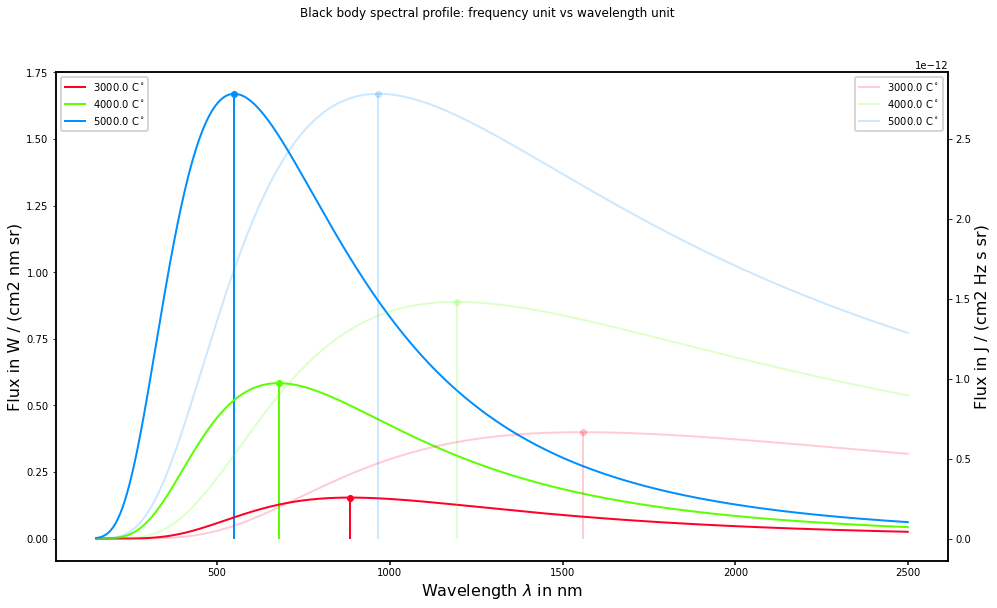

In [27]:
# Documentation for this module can be found here:
#https://docs.astropy.org/en/stable/api/astropy.modeling.physical_models.BlackBody.html?highlight=BlackBody

# Numerical stuff
import numpy as np

# Viz
import matplotlib.pyplot as plt

# Physics
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
from astropy.modeling import models
from astropy import units as u #https://docs.astropy.org/en/stable/units/

def get_astropy_bb(temp_deg):
    return models.BlackBody(temperature=(temp_deg*u.deg_C).to(
        u.K,equivalencies=u.temperature()))

# Define the whole range of wavelength
wav = np.arange(150, 2500) * u.nm
wav_unit = wav.unit
temp_range = [3000,4000,5000]
cm = plt.get_cmap('gist_rainbow')

colors = [cm(1. * i / len(temp_range)) for i in range(len(temp_range))]
alpha = 0.2
light_colors = [tuple(list(cm(1. * i / len(temp_range)))[:-1]+[alpha]) for i in range(len(temp_range))]

hz_flux_unit=u.Joule/(u.cm**2 * u.Hertz * u.second * u.steradian)
nm_flux_unit=u.W/(u.cm**2 * u.nanometer * u.steradian)

with quantity_support():
    fig, ax1 = plt.subplots(figsize=(16, 9))
    fig.suptitle("Black body spectral profile: frequency unit vs wavelength unit")
    ax1.set_xlabel("Wavelength $\lambda$ in nm")

    # Plot wavelength
    ax1.set_ylabel(f"Flux in {nm_flux_unit}")

    # Plot frequency
    ax2 = ax1.twinx()
    ax2.set_ylabel(f"Flux in {hz_flux_unit}")
    
    for temp_c, color, light_color in zip(temp_range, colors, light_colors):
        bb_astropy = get_astropy_bb(temp_c)
        flux_astropy = bb_astropy(wav)
        
        # Plot wavelength
        ax1.plot(wav, flux_astropy.to(nm_flux_unit, equivalencies=u.spectral_density(wav)), color=color,
                 label=f"{temp_c:.1f} C$^\circ$")
        max_wav = bb_astropy.lambda_max.to(wav_unit, equivalencies=u.spectral())
        markerline, stemlines, baseline = ax1.stem([max_wav], [bb_astropy(max_wav).to(nm_flux_unit,
                                      equivalencies=u.spectral_density(max_wav))],use_line_collection=True)
        plt.setp(stemlines, 'color', color)
        plt.setp(markerline, 'color', color)

        # Plot frequency
        ax2.plot(wav, flux_astropy.to(hz_flux_unit), color=light_color, label=f"{temp_c:.1f} C$^\circ$")
        max_wav = bb_astropy.nu_max.to(wav_unit, equivalencies=u.spectral())
        markerline, stemlines, baseline = ax2.stem([max_wav], [bb_astropy(max_wav).to(hz_flux_unit,
                                      equivalencies=u.spectral_density(max_wav))],use_line_collection=True)
        plt.setp(stemlines, 'color', light_color)
        plt.setp(markerline, 'color', light_color)

        
    ax1.legend( loc="upper left") #bbox_to_anchor=(0.05,0.70),
    ax2.legend(loc="upper right") #bbox_to_anchor=(0.85,0.70),

plt.show()
